In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

warnings.simplefilter("ignore")

In [2]:
file = r'C:\Users\diopp\OneDrive\Python\water_potability.csv'
df=pd.read_csv(file)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#remplir les ligne vide avec la moyenne
df.fillna(df.mean(), inplace=True)

In [5]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [6]:
X = df.drop(['Potability'],axis=1)
y = df['Potability']

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=17)

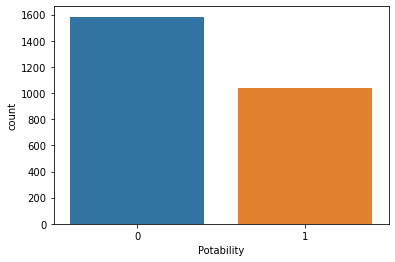

In [8]:
sns.countplot(x=y_train)

In [9]:
rus = RandomUnderSampler(sampling_strategy=0.75)
X_train,y_train = rus.fit_resample(X_train,y_train)

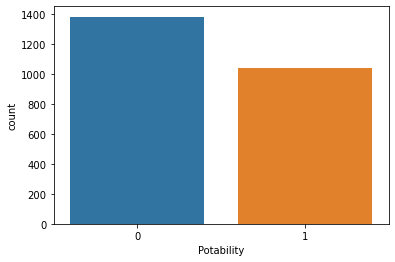

In [10]:
sns.countplot(x=y_train)

In [11]:
smote = SMOTE(sampling_strategy='minority')
X_train,y_train = smote.fit_resample(X_train,y_train)

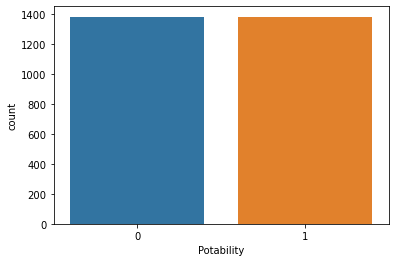

In [12]:
sns.countplot(x=y_train)

In [13]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_scaled

array([[0.72928256, 0.36615946, 0.29704921, ..., 0.49439174, 0.6993587 ,
        0.52779593],
       [0.50577104, 0.55580113, 0.47930813, ..., 0.68007869, 0.50266227,
        0.31278992],
       [0.50577104, 0.53979389, 0.28877861, ..., 0.4734509 , 0.42787957,
        0.48332146],
       ...,
       [0.50256007, 0.53311315, 0.47615102, ..., 0.55203613, 0.30957189,
        0.44029977],
       [0.62028922, 0.25279789, 0.33065078, ..., 0.47870766, 0.45690075,
        0.60906645],
       [0.50597717, 0.56040207, 0.35271006, ..., 0.60042924, 0.37878022,
        0.5190374 ]])

In [14]:
X=df.iloc[:,2:9].values

In [15]:
X

array([[2.07913190e+04, 7.30021187e+00, 3.68516441e+02, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [1.86300579e+04, 6.63524588e+00, 3.33775777e+02, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [1.99095417e+04, 9.27588360e+00, 3.33775777e+02, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [3.31555782e+04, 7.35023323e+00, 3.33775777e+02, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [1.19838694e+04, 6.30335653e+00, 3.33775777e+02, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [1.74041771e+04, 7.50930586e+00, 3.33775777e+02, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [16]:
X.shape

(3276, 7)

In [17]:
y=df.iloc[:,-1].values

In [18]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [19]:
y.shape

(3276,)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, stratify = y, random_state=42)

In [21]:
X_train.shape

(2620, 7)

In [22]:
X_test.shape

(656, 7)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.04803985, -0.79180869,  2.04779619, ...,  0.56524237,
        -0.36484887, -0.17745664],
       [-1.01608039,  0.85091664,  1.61324131, ..., -2.16944822,
        -1.58087247, -0.48650158],
       [ 0.80819229, -0.58571418, -0.00445694, ...,  0.08540402,
        -0.3510287 ,  0.5472018 ],
       ...,
       [ 1.40869927,  1.43576906, -0.37757003, ...,  0.59112626,
         1.52156075, -0.79398318],
       [ 0.17629195, -0.03114435, -0.00445694, ...,  1.81798425,
         0.80706588,  0.25234143],
       [-0.26137162, -1.51059515,  2.72223693, ..., -0.76051077,
         0.44555634,  0.59461298]])

In [25]:
X_test=scaler.transform(X_test)
X_test

array([[-0.3254696 , -0.6767879 , -0.00445694, ...,  0.2658838 ,
         0.78164355, -1.6023363 ],
       [-1.3003955 ,  0.37913139, -0.31512757, ...,  2.11207446,
         0.12715013,  0.20020978],
       [ 0.46984357,  0.43334952,  0.67608052, ...,  0.0531646 ,
         1.52413394,  0.55997814],
       ...,
       [ 0.48268297, -1.23738404,  0.65853333, ..., -1.91516881,
        -0.1555956 ,  0.93160969],
       [-1.43215209, -0.723649  ,  0.41632186, ..., -0.10156982,
         1.43213339,  0.7505242 ],
       [ 0.1069405 ,  0.98824319,  0.82963824, ...,  0.31490282,
         0.47919038, -0.29818159]])

In [26]:
np.sqrt(X_train.shape[0])

51.18593556827891

In [27]:
k=51

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=51)

In [30]:
y_pred=knn.predict(X_test)

In [31]:
y_pred.shape

(656,)

In [32]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6189024390243902

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[387,  13],
       [237,  19]], dtype=int64)

In [35]:
y_pred=knn.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred)

0.6189024390243902

In [37]:
def predict_output():
    ph=int(input("Enter the ph "))
    Hardness=int(input("Enter the hardness "))
    Solids=int(input("Enter the Solids "))
    Sulfate=int(input("Enter the Sulfate "))
    Chloramines=int(input("Enter the Chloramines "))
    Conductivity=int(input("Enter the Conductivity "))
    Organic_carbon =int(input("Enter the Organic_carbon  "))
    
    
    
    
    X_new=np.array([[ph],[Hardness],[Solids],[Sulfate],[Chloramines],[Conductivity],[Organic_carbon]]).reshape(1,7)
    # X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "non potable"
    else:
        return "potable"

In [39]:
predict_output()

Enter the ph 25
Enter the hardness 656
Enter the Solids 95
Enter the Sulfate 264
Enter the Chloramines 925
Enter the Conductivity 925
Enter the Organic_carbon  298


'non potable'